# K-means Clustering

## Loading of Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex7data2.mat")
X  = mat["X"]

# Finding closest centorids

$c^{(i)} := j$ that minimizes $\Vert x^{(i)}-\mu_j\Vert^2$

numpy.argmin() : 최소값의 index 반환

각각의 x(i)가 어떤 centroid에 가장 가까운지 찾음

In [3]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [4]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n", idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


## Computing centorid means

$\mu_k:=\frac{1}{c_k}\sum_{i\in c_k}x^{(i)}$

In [5]:
def computeCentroids(X, idx, K):
    m, n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
        
    return centroids/count

In [6]:
centroids = computeCentroids(X, idx, K)
print("Centroids cojmputed after initial finding of closest centroids:\n", centroids)

Centroids cojmputed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Visualizing K-means Clustering

새로운 centroid를 계산하는것과 centroid에 가장 가까운 x들을 표시하는 과정을 반복

In [7]:
def plotKmeans(X, centroids, idx, K, num_iters):
    m, n = X.shape[0], X.shape[1]
    fig, ax = plt.subplots(nrows=num_iters, ncols=1, figsize=(6,36))
    
    for i in range(num_iters):
        color = "rgb"
        for k in range(1, K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
            
        ax[i].scatter(centroids[:,0], centroids[:,1], s=120, marker="x", c="black", linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        centroids = computeCentroids(X, idx, K)
        
        idx = findClosestCentroids(X, centroids)
        
    plt.tight_layout()

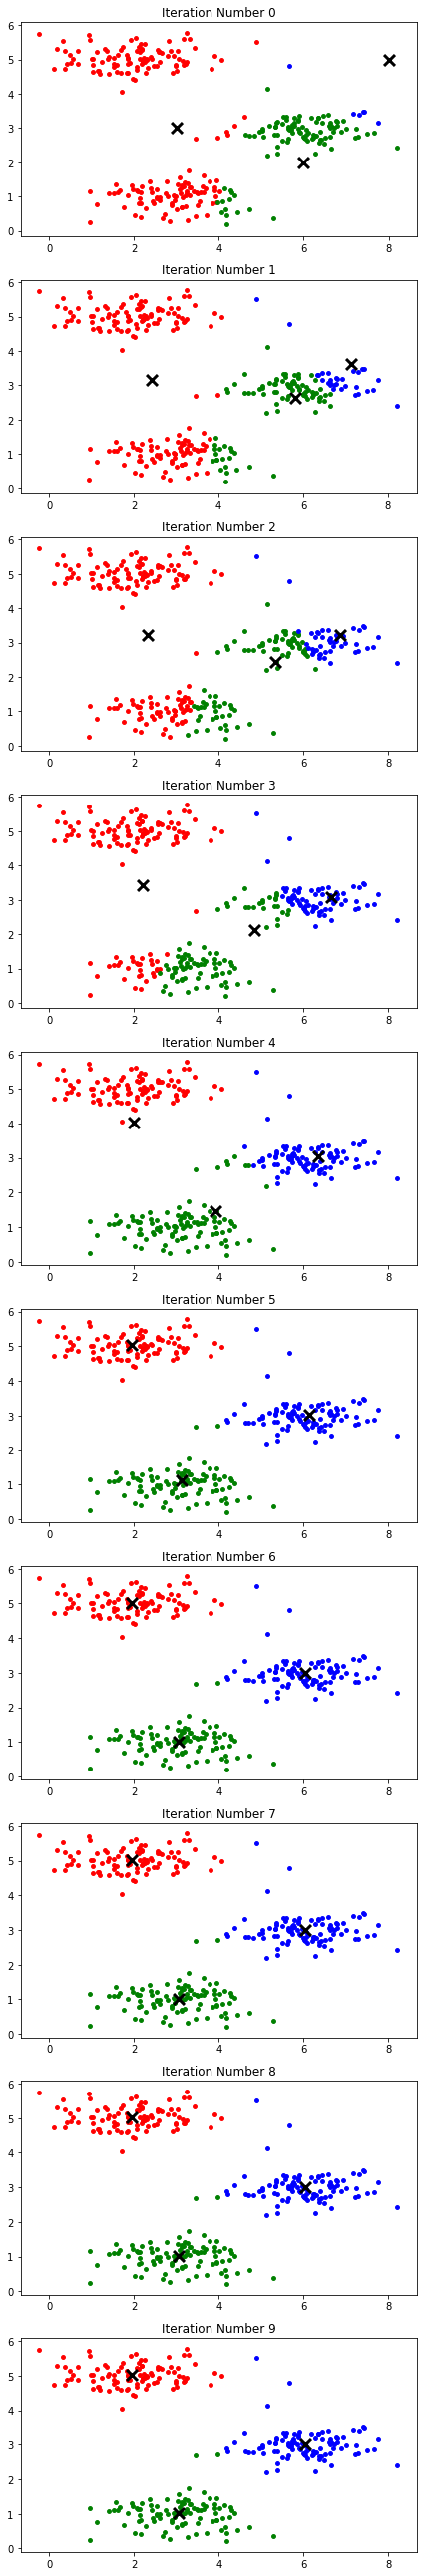

In [8]:
m, n = X.shape[0], X.shape[1]
plotKmeans(X, initial_centroids, idx, K, 10)

## Random Initialization

In [9]:
def kMeansInitCentroids(X, K):
    m, n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

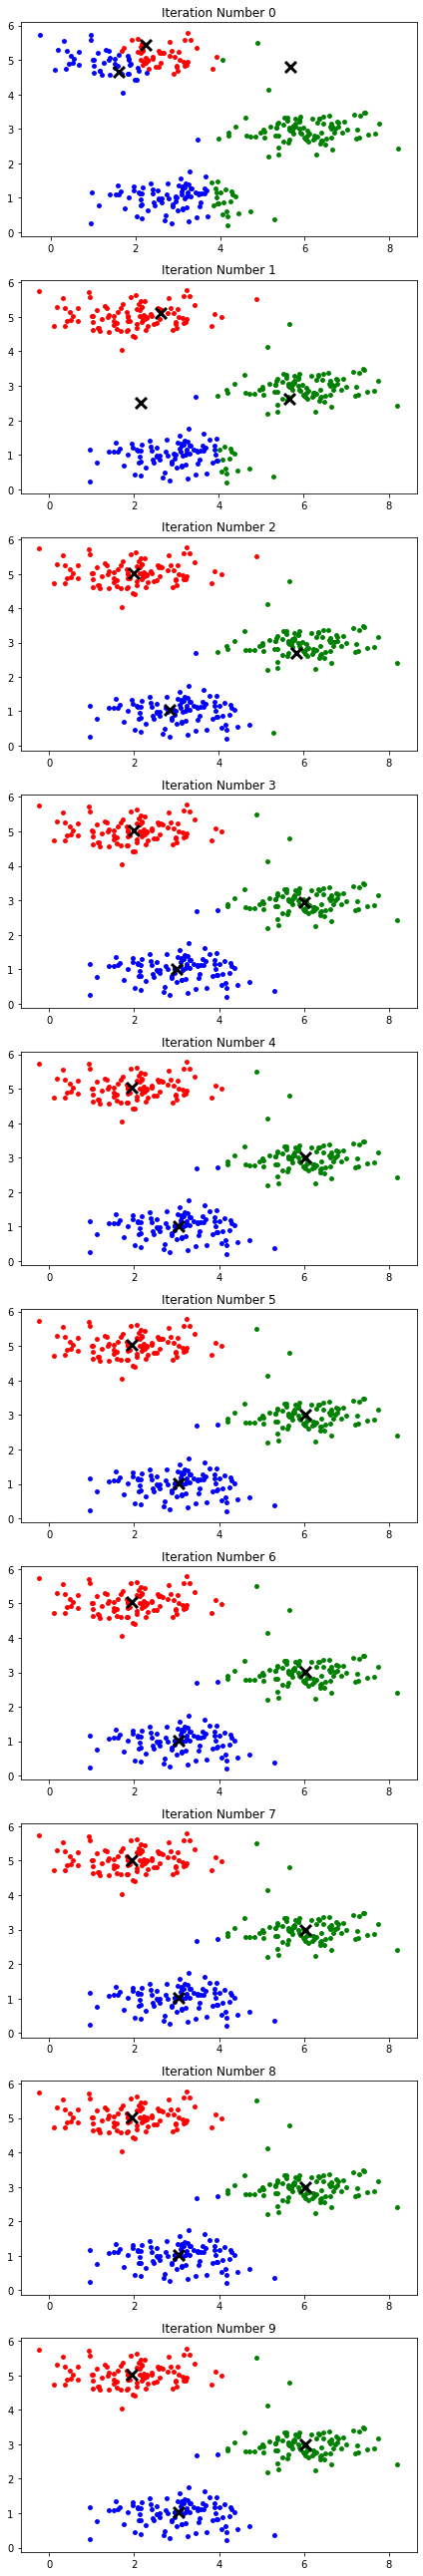

In [10]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids, idx, K, 10)

# Image Compression with K-means

In [11]:
mat2 = loadmat("bird_small.mat")
A = mat2["A"]

X2 = (A/255).reshape(128*128,3)

In [12]:
def runKmeans(X, initial_centroids, num_iters, K):
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in tqdm(range(num_iters)):
        centroids = computeCentroids(X, idx, K)
        idx = findClosestCentroids(X, initial_centroids)
        
    return centroids, idx

In [13]:
from tqdm.notebook import tqdm

K2 = 10  # 이미지의 색깔을 K2개 만큼만 쓰도록 바꾸게 된다
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)


"centroids2에는 K2개로 분류된 색깔정보가 저장되게 된다"
centroids2, idx2 = runKmeans(X2, initial_centroids2, num_iters, K2)

이 때 idx2는 (16384,1) 형태의 array고 X2_recovered는 (128,128,3)의 array다  

X2_recovered에 아래와 같이 ravel로 인덱싱하게되면 idx2는 (128,128)형태가 되고 idx2에서 i값과 같은 값을 가진 index에 해당하는 X2_recovered의 값에 i번째 cluster에 해당하는 색깔정보를 입력받게 된다

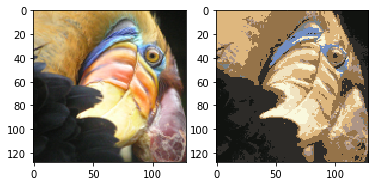

In [14]:
m2, n2 = X.shape[0], X.shape[1]
X2_recovered = X2.copy()


for i in range(1, K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

X2_recovered = X2_recovered.reshape(128,128,3)

import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)
plt.show()

## Principal Component Analysis

In [15]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]

## Plotting the data

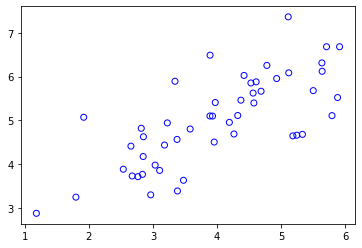

In [16]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.show()

## Implementing PCA

Covariance matrix is computed by $\Sigma = \frac{1}{m}X^TX$

svd : Singular Value Decomposition (특이값 분해)  
(m x n) 형태의 벡터를 (m x m) 형태의 고유벡터 U, 고유값 S, (n x n)형태의 고유벡터로 분해한다

In [17]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma

In [18]:
def pca(X):
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [19]:
from numpy.linalg import svd
X_norm, mu, std = featureNormalize(X3)
U, S, V = pca(X_norm)

## Visualizing PCA

각각의 고유벡터의 중심은 mu가 되고, 고유벡터에 고유값과 1.5를 곱한 형태의 벡터를 시각화한다

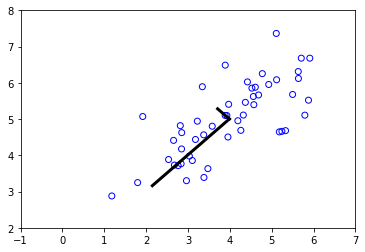

In [20]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)
plt.show()

## Dimensionality reduction with PCA

고유값이 크다는 것은 그만큼 고유벡터와 고유값의 곱이 나타내는 벡터의 길이가 길고 데이터가 넓게 분포했기에 차원 축소를 했을때 잃는 정보의 값이 크다는 것이다.  
따라서 데이터를 K차원으로 축소한 (낮은 차원에 투영한) z를 만들기 위해선 행렬 U의 왼쪽에서부터 K개의 벡터만 남기고 x와 행렬곱을 하면 된다.

In [21]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [22]:
S

array([1.73553038, 0.26446962])

In [23]:
def projectData(X, U, K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
            
    return Z

In [24]:
K = 1
Z = projectData(X_norm, U, K)
print("Projection of the first example:", Z[0][0])

Projection of the first example: 1.4963126084578515


## Reconstructiong an approximation of the data

U_reduced의 전치행렬을 곱해 다시 차원을 근사적으로 확장시킨 X_rec를 반환한다.

In [25]:
def recoverData(Z, U, K):
    m, n = Z.shape[0], U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
        
    return X_rec

In [26]:
X_rec = recoverData(Z, U, K)
print("Approximation of the first example:", X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


## Visualizing the projections

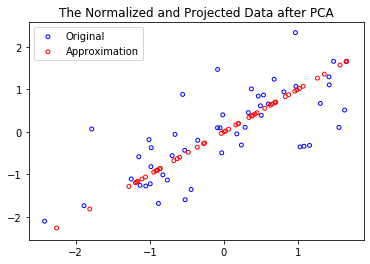

In [27]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()
plt.show()

## Face Image Dataset

In [28]:
mat4 = loadmat("ex7faces.mat")
X4 = mat4["X"]

In [29]:
X4.shape

(5000, 1024)

## Visualizing the dataset

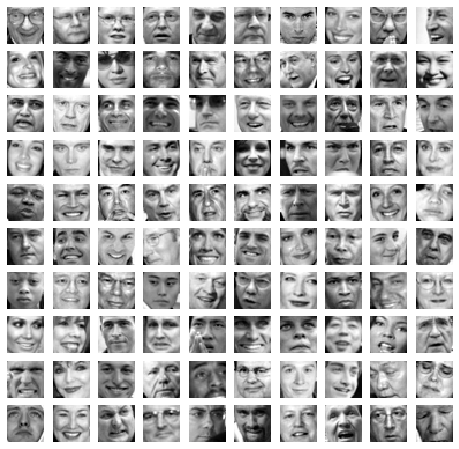

In [30]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")
        
plt.show()

## PCA on face

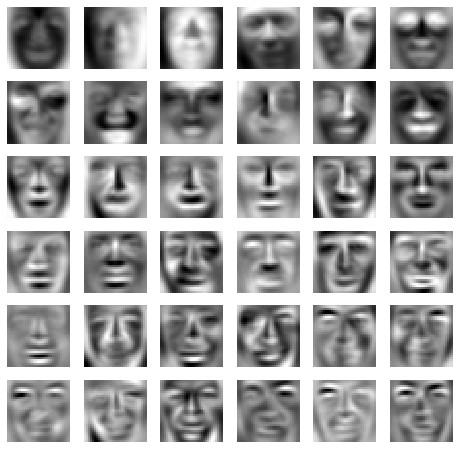

In [31]:
X_norm2 = featureNormalize(X4)[0]

U2 =pca(X_norm2)[0]

U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

plt.show()

In [32]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


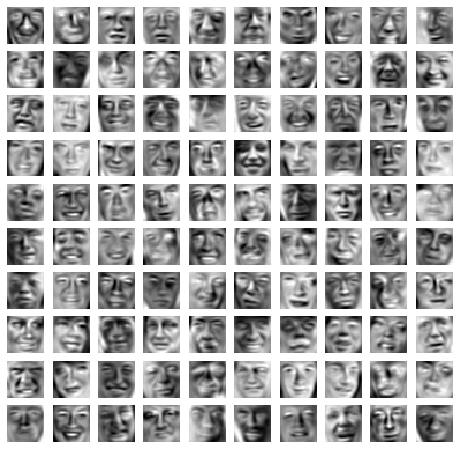

In [33]:
X_rec2  = recoverData(Z2, U2, K2)

fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")
        
plt.show()